In [1]:
# importing pre-requisite libraries
import os
import sys

In [2]:
# Get the absolute path of the credit_risk package
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
print(project_root)

c:\Aravind's File\Projects\Sales-Prediction


In [22]:
#importing the modules from the package
from utils.utils import *
from utils.eda_utils import *

In [4]:
config_ = load_config()
config_

{'data': {'path': "C:/Aravind's File/Projects/Sales-Prediction/data/",
  'sales_data': 'Walmart.csv',
  'preprocessed_data': 'preprocessed_data.parquet',
  'feature_engineered_data': 'feature_engineered_data.parquet',
  'model_input_data': 'model_input_data.parquet'}}

In [5]:
data_path_list = return_config_params('data')
data_path_list

{'path': "C:/Aravind's File/Projects/Sales-Prediction/data/",
 'sales_data': 'Walmart.csv',
 'preprocessed_data': 'preprocessed_data.parquet',
 'feature_engineered_data': 'feature_engineered_data.parquet',
 'model_input_data': 'model_input_data.parquet'}

In [6]:
# Load the data
sales_data = pd.read_csv(os.path.join(data_path_list['path'], data_path_list['sales_data']))
sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# 1. Basic EDA

In [7]:
# Store - the store number
# Date - the week of sales
# Weekly_Sales - sales for the given store
# Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
# Temperature - Temperature on the day of sale
# Fuel_Price - Cost of fuel in the region
# CPI – Prevailing consumer price index
# Unemployment - Prevailing unemployment rate
# Holiday - the state holiday

In [8]:
sales_data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [9]:
sales_data.info() # No missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
sales_data.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [52]:
# min and max values of the date column
sales_data['Date'].min(), sales_data['Date'].max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [11]:
# checking how many numerical and categorical features are there in the data
numerical_features = sales_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = sales_data.select_dtypes(include=['object']).columns.tolist()
print(f"Numerical features: {numerical_features} and Categorical features: {categorical_features}")

Numerical features: ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] and Categorical features: ['Date']


In [12]:
# I want to automatically check values in all features and then decide which features are numerical and categorical
# Automatically determine numerical and categorical features
numerical_features = sales_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = sales_data.select_dtypes(include=['object']).columns.tolist()

# Check for features that might be misclassified (e.g., numerical IDs stored as objects)
for col in sales_data.columns:
    unique_values = sales_data[col].nunique()
    if unique_values < 100:  # Arbitrary threshold for categorical-like behavior
        print(f"Feature '{col}' has {unique_values} unique values and might be categorical.")
        numerical_features.remove(col) if col in numerical_features else None
        categorical_features.append(col) if col not in categorical_features else None

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Feature 'Store' has 45 unique values and might be categorical.
Feature 'Holiday_Flag' has 2 unique values and might be categorical.
Numerical features: ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
Categorical features: ['Date', 'Store', 'Holiday_Flag']


## 1.1 Creating Date variables

In [13]:
# creating year, month and day columns from the date column
sales_data['Date'] = pd.to_datetime(sales_data['Date'], dayfirst=True)
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Day'] = sales_data['Date'].dt.day
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
sales_data['DayOfWeek'] = sales_data['Date'].dt.dayofweek

In [14]:
sales_data.head(100)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Week,DayOfWeek
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,6,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,7,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,8,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2011-12-02,1584083.95,0,48.91,3.172,218.714733,7.866,2011,12,2,48,4
96,1,2011-12-09,1799682.38,0,43.93,3.158,218.961846,7.866,2011,12,9,49,4
97,1,2011-12-16,1881176.67,0,51.63,3.159,219.179453,7.866,2011,12,16,50,4
98,1,2011-12-23,2270188.99,0,47.96,3.112,219.357722,7.866,2011,12,23,51,4


In [42]:
# converting the categorical features to category type
sales_data['Store'] = sales_data['Store'].astype('category')
sales_data['Holiday_Flag'] = sales_data['Holiday_Flag'].astype('category')
sales_data['Year'] = sales_data['Year'].astype('category')
sales_data['Month'] = sales_data['Month'].astype('category')
sales_data['Day'] = sales_data['Day'].astype('category')
sales_data['Week'] = sales_data['Week'].astype('category')
sales_data['DayOfWeek'] = sales_data['DayOfWeek'].astype('category')

# 2. Univariate and Bivariate Analysis

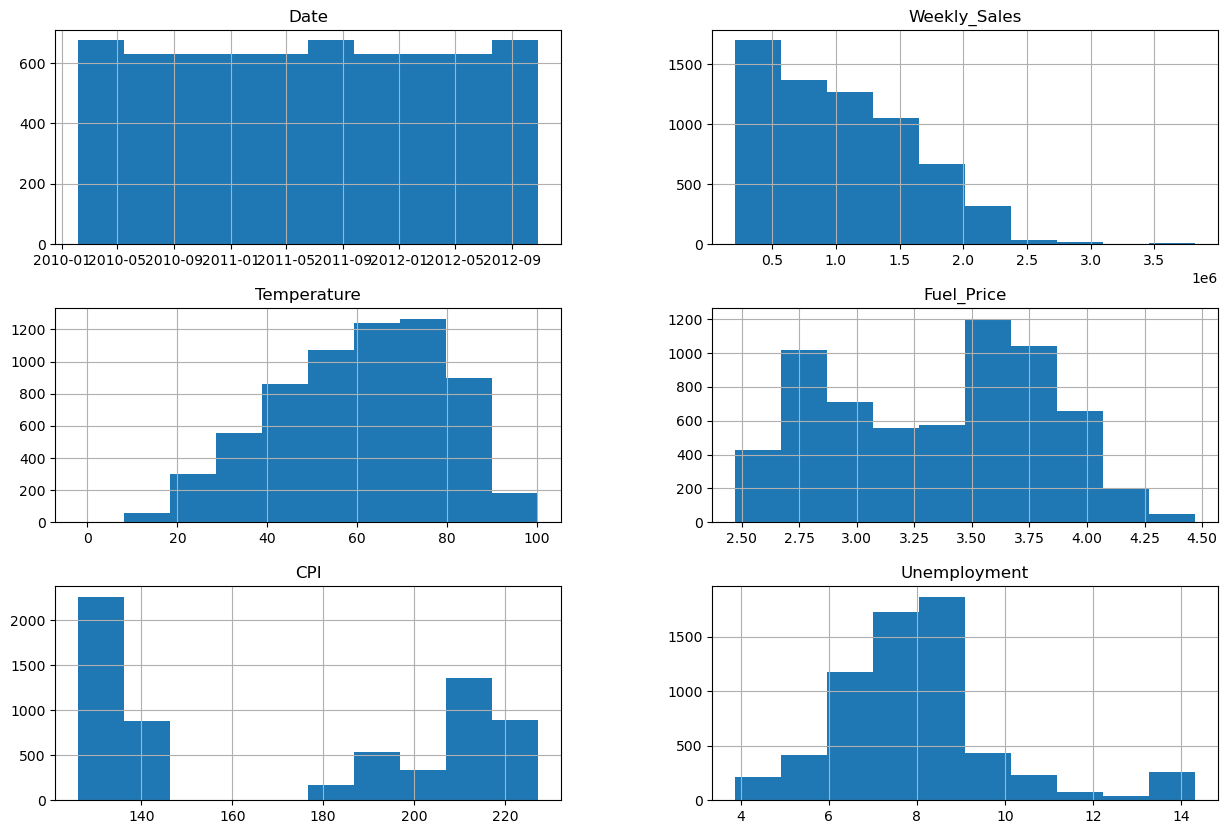

In [43]:
_ = sales_data.hist(figsize=(15, 10))

In [ ]:
# Weekly_Sales: The distribution is right-skewed, indicating that most weeks have lower sales, with a few weeks having exceptionally high sales. This is common in retail data.
# Holiday_Flag: The distribution shows that most weeks are non-holiday weeks, with fewer holiday weeks. This is expected as holidays are less frequent.
# Temperature: The distribution is roughly normal, indicating a balanced representation of temperatures. This is important for understanding seasonal effects on sales.
# Fuel_Price: Shows varying fuel price ranges, possibly reflecting different time periods or regional variations. Multiple peaks might indicate fuel price changes over different years.
# CPI: Two distinct groups of CPI values, possibly due to data from different time periods or store groups. Might require separate modeling strategies if groups differ significantly.
# Unemployment: Most unemployment rates are clustered between 6% and 9%, with fewer instances of high unemployment. Suggests the data comes mostly from stable economic conditions.

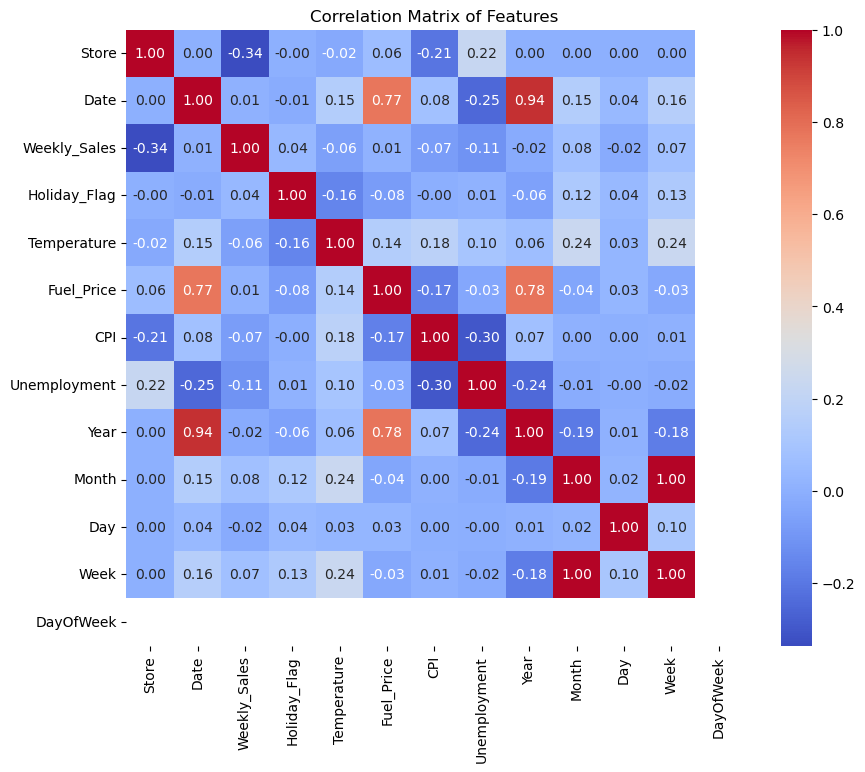

In [44]:
# checking the correlation between the numerical features
correlation_matrix = sales_data.corr()#sales_data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features")
plt.show()

### 2.1 Weekly Sales

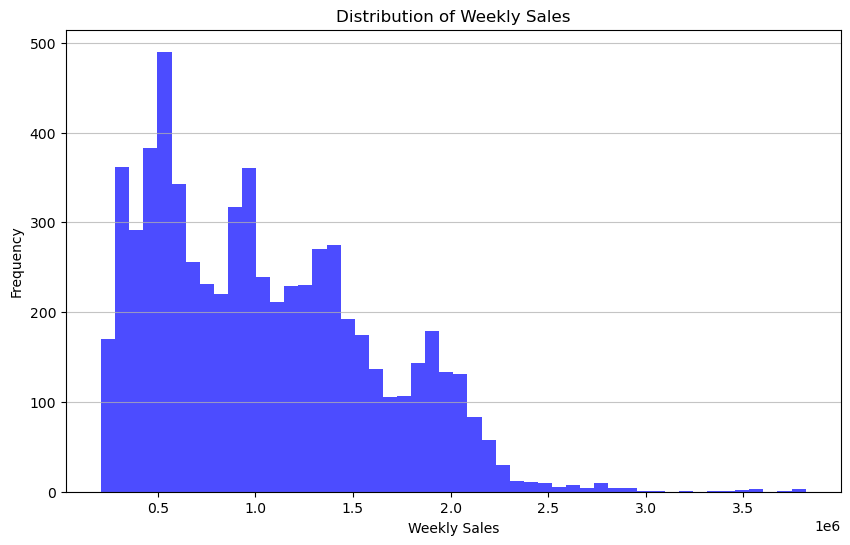

In [45]:
# what is the distribution of the target variable
plt.figure(figsize=(10, 6))
plt.hist(sales_data['Weekly_Sales'], bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

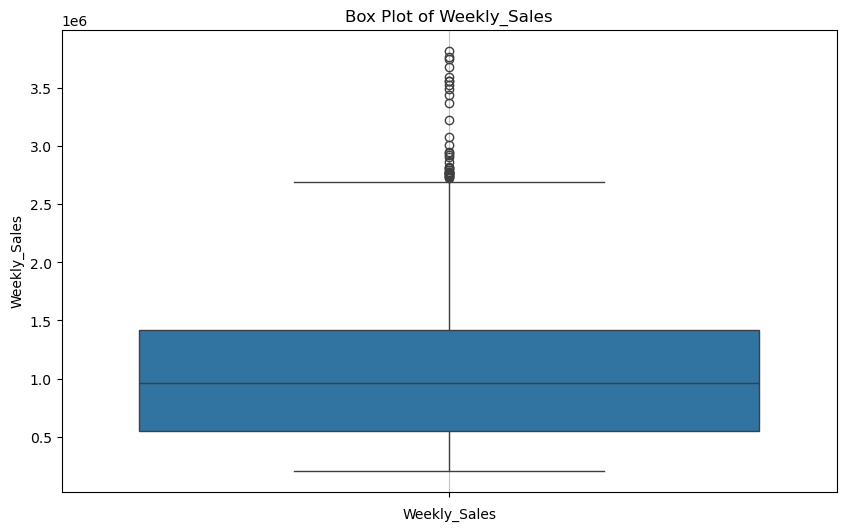

In [46]:
custom_box_plot_one_var(sales_data, 'Weekly_Sales')

1. There are considerable amount of outliers from 2.7M sales. Possible due to holidays or high performing stores.
2. median is somewhere between 900k to 1M
3. The right skew we observed in histogram indicates that there are some weeks with much higher sales than average and the same is being observed after 75% IQR

In [47]:
sales_data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Week',
       'DayOfWeek'],
      dtype='object')

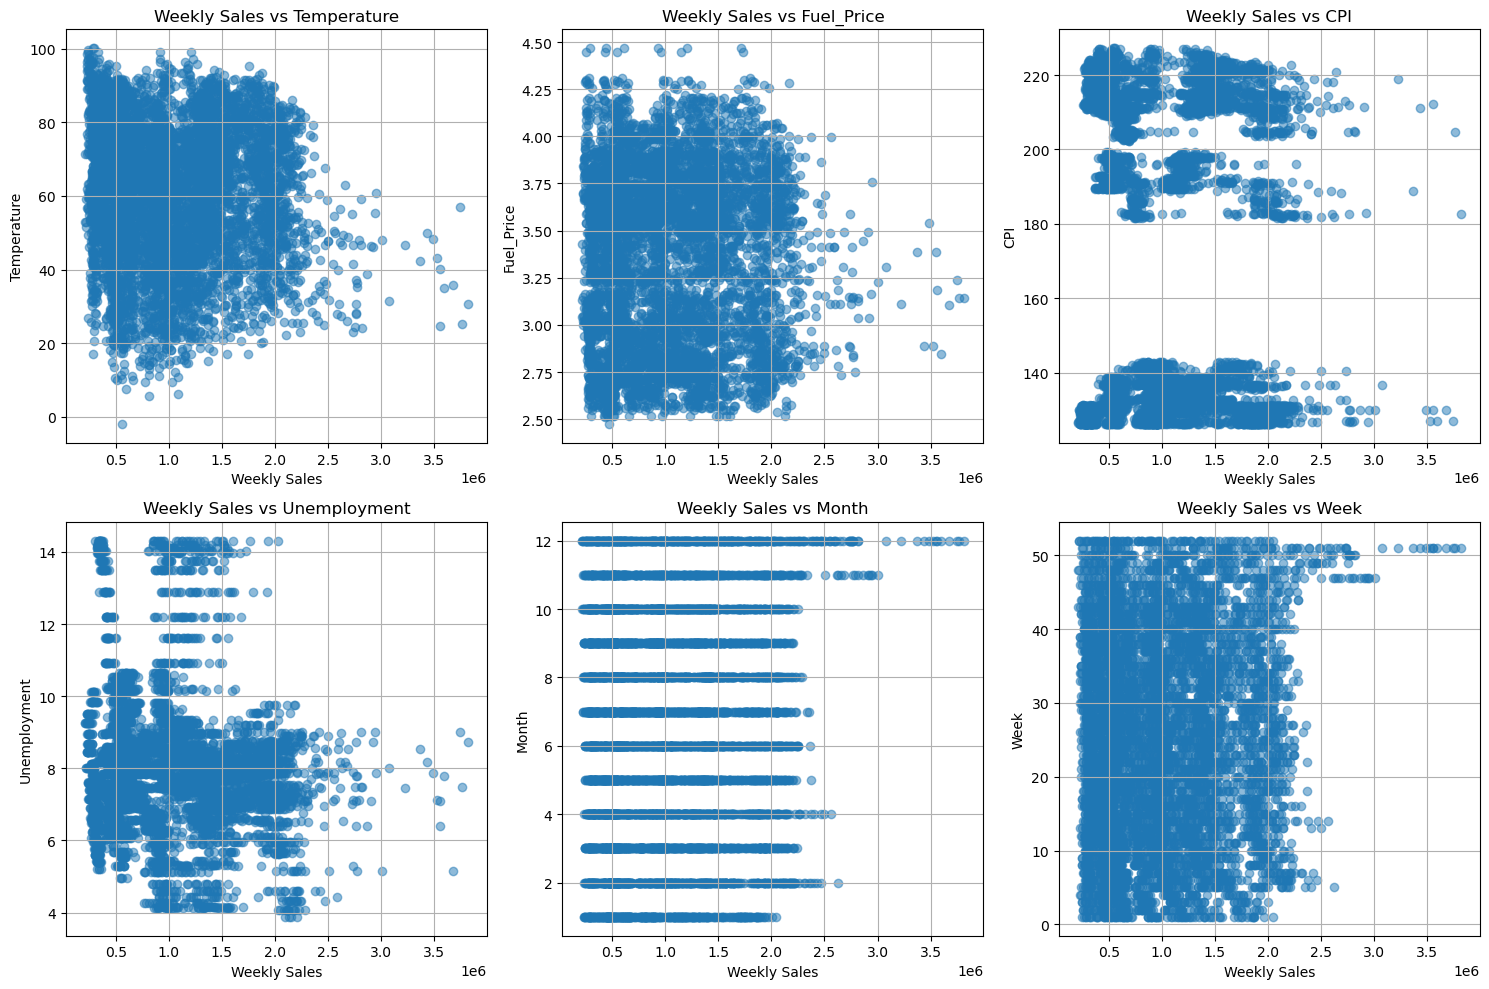

In [48]:
# Scatter plot between the target variable and numerical features
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Week']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    # print(i, feature)
    plt.subplot(2, 3, i)
    plt.scatter(sales_data['Weekly_Sales'], sales_data[feature], alpha=0.5)
    plt.title(f"Weekly Sales vs {feature}")
    plt.xlabel("Weekly Sales")
    plt.ylabel(feature)
    plt.grid()

plt.tight_layout()
plt.show()

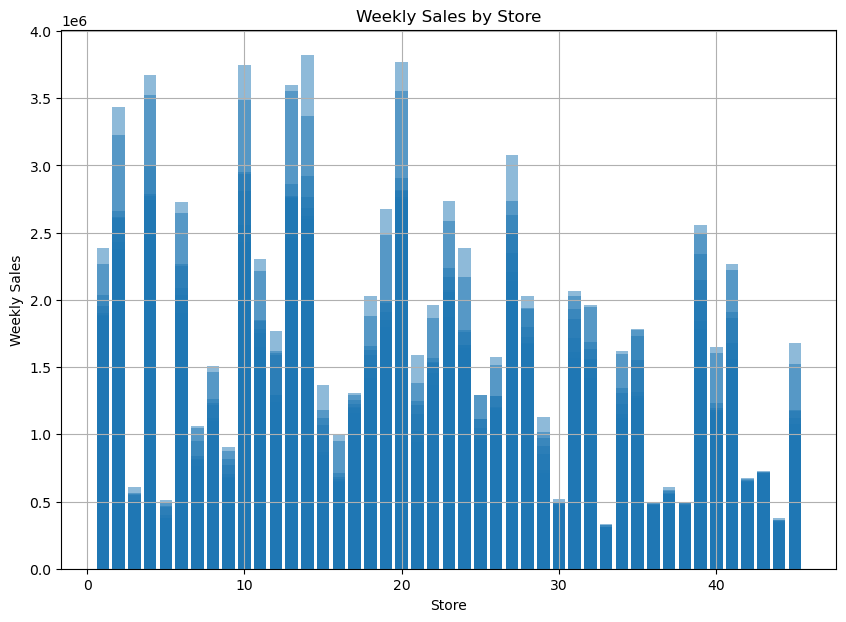

In [49]:
# checking weekly sales by store
plt.figure(figsize=(10, 7))
plt.bar(sales_data['Store'], sales_data['Weekly_Sales'], alpha=0.5)
plt.title("Weekly Sales by Store")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.grid()
plt.show()

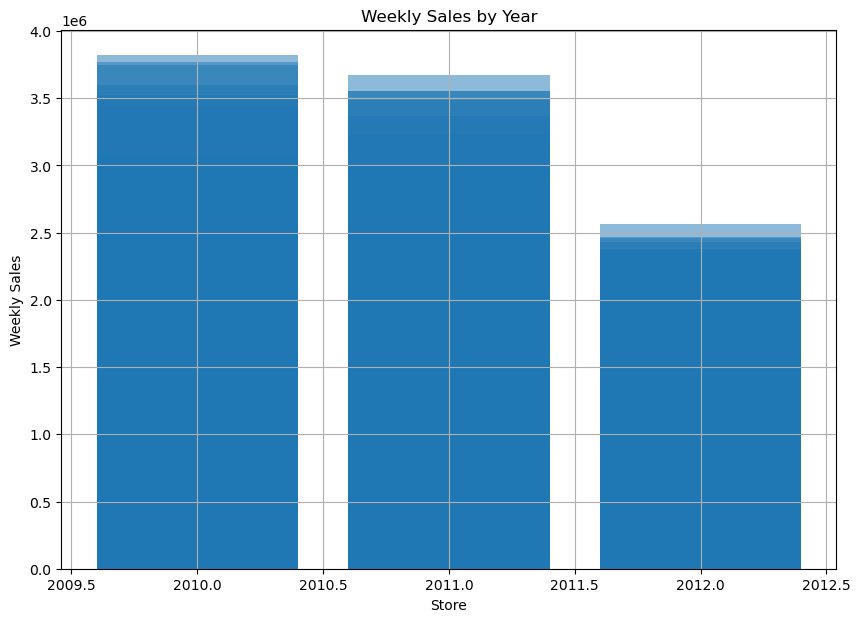

In [53]:
# checking weekly sales by year
plt.figure(figsize=(10, 7))
plt.bar(sales_data['Year'], sales_data['Weekly_Sales'], alpha=0.5)
plt.title("Weekly Sales by Year")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.grid()
plt.show()

C:\Users\aravi\AppData\Local\Temp\ipykernel_17616\2149893973.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_data, x='Month', y='Weekly_Sales', hue='Year', ci=None)


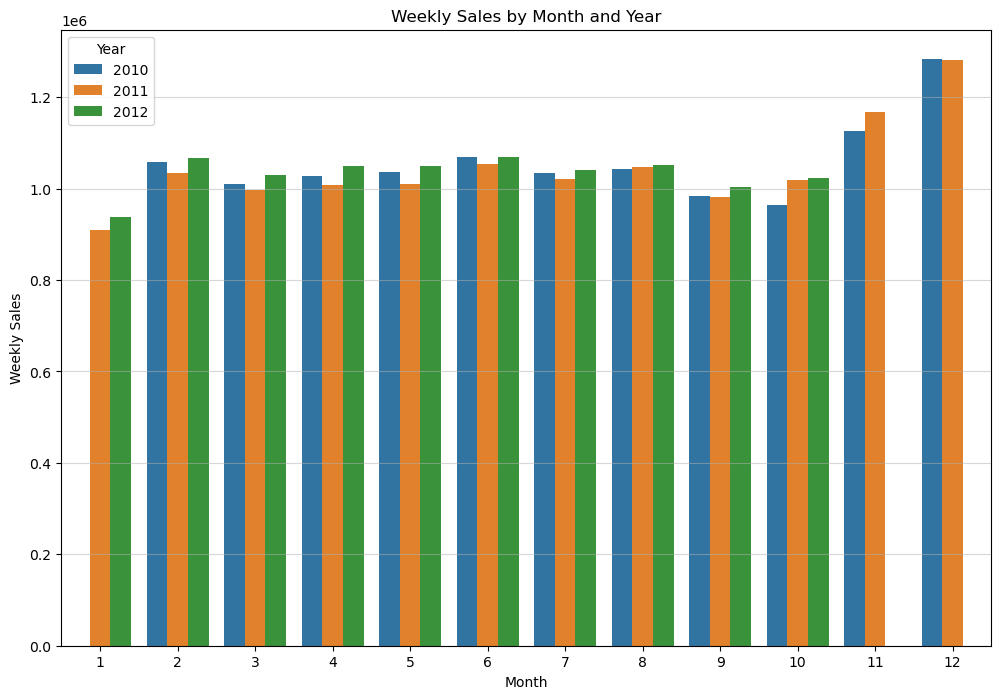

In [55]:
# checking weekly sales by month and year
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_data, x='Month', y='Weekly_Sales', hue='Year', ci=None)
plt.title("Weekly Sales by Month and Year")
plt.xlabel("Month")
plt.ylabel("Weekly Sales")
plt.legend(title="Year")
plt.grid(axis='y', alpha=0.5)
plt.show()

## 2.2 Holiday Flag

C:\Users\aravi\AppData\Local\Temp\ipykernel_17616\2908748318.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_data, x='Store', y='Weekly_Sales', hue='Holiday_Flag', ci=None)


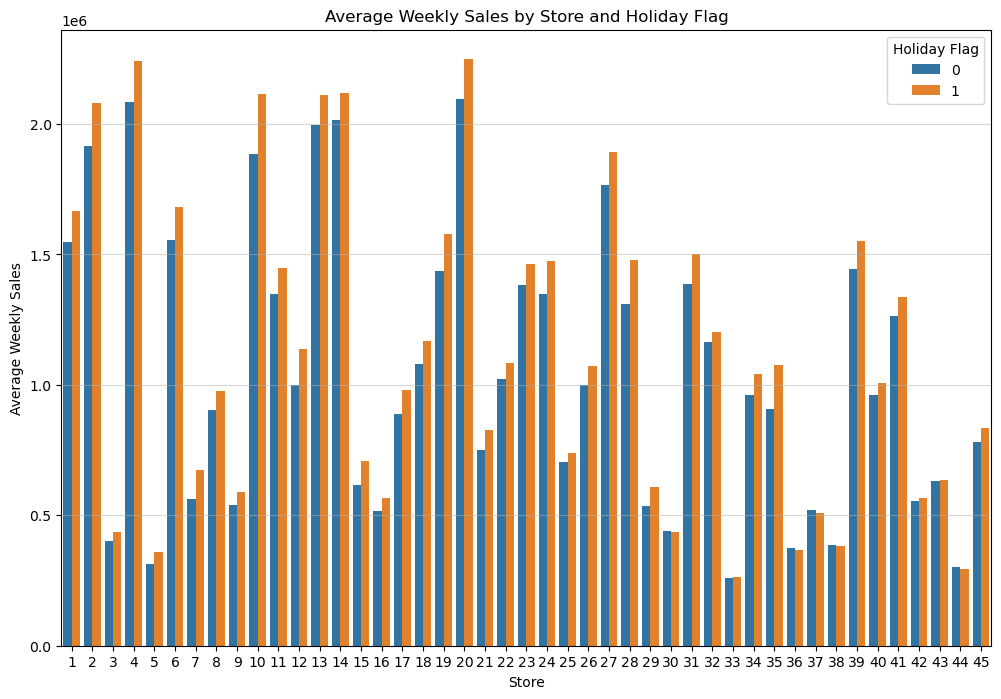

In [57]:
# Average weekly sales by store and holiday flag
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_data, x='Store', y='Weekly_Sales', hue='Holiday_Flag', ci=None)
plt.title("Average Weekly Sales by Store and Holiday Flag")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.legend(title="Holiday Flag")
plt.grid(axis='y', alpha=0.5)
plt.show()

1. we can understand that whenever there was a holiday most of the stores had more sales

In [59]:
sales_data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Week',
       'DayOfWeek'],
      dtype='object')

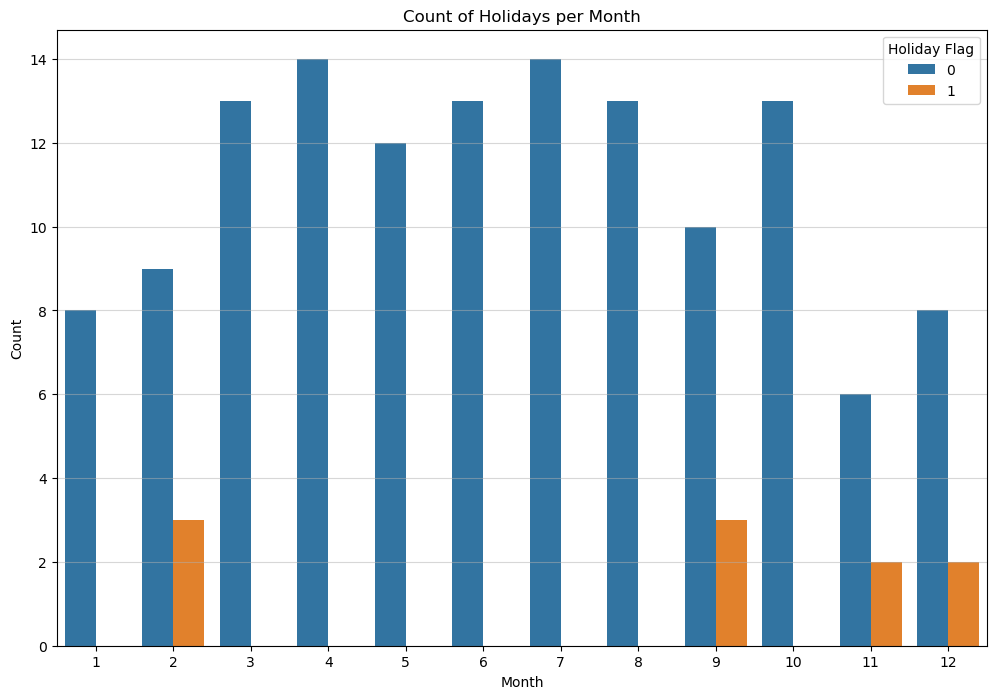

In [60]:
# counting the number of holidays per month
plt.figure(figsize=(12, 8))
sns.countplot(data=sales_data[['Month', 'Day', 'Week', 'Holiday_Flag']].drop_duplicates(), x='Month', hue='Holiday_Flag')
plt.title("Count of Holidays per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Holiday Flag")
plt.grid(axis='y', alpha=0.5)
plt.show()

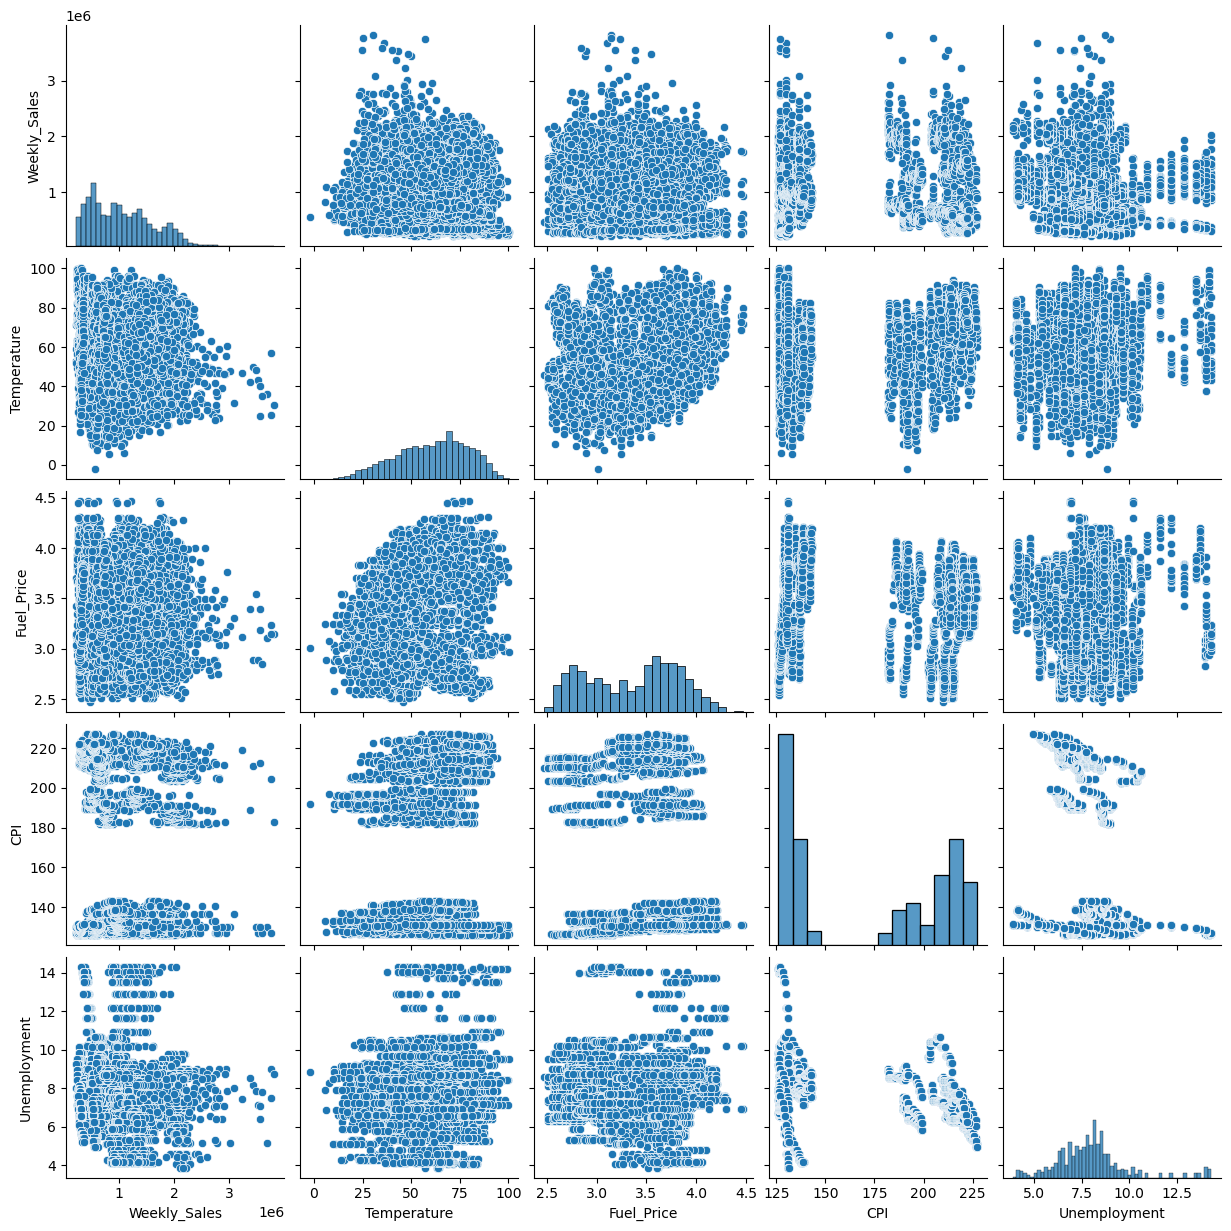

In [61]:
# pair plot of total data
sns.pairplot(sales_data)
plt.show()

## 2.3 CPI
CPI data is showing two clusters of data. This could be due to different time periods/different regions of data reported

C:\Users\aravi\AppData\Local\Temp\ipykernel_17616\498042887.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_data, x='Month', y='CPI', hue='Year', ci=None)


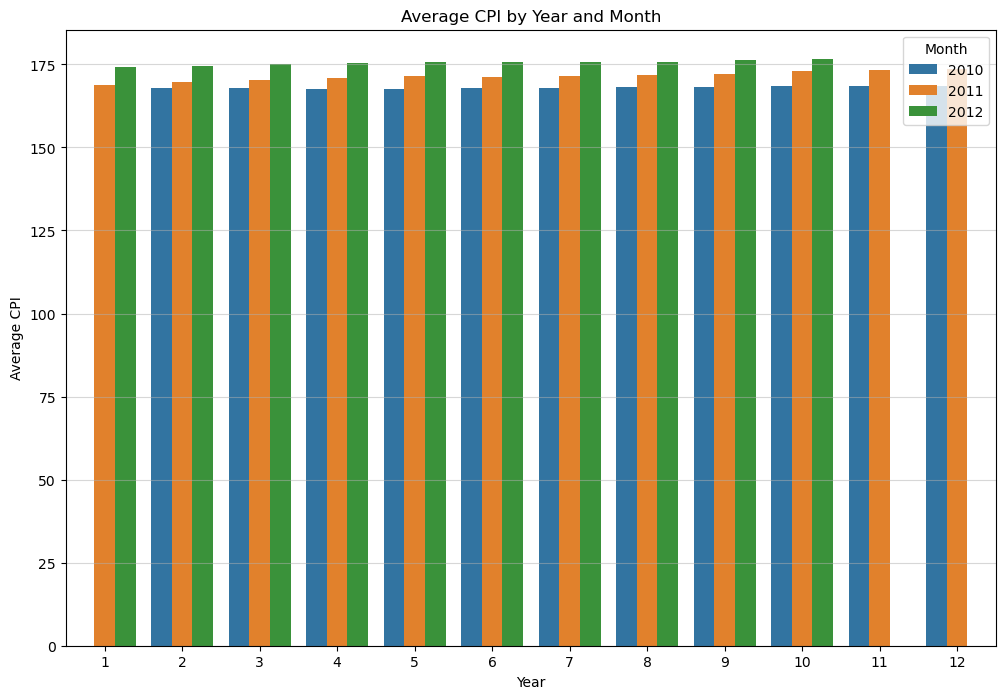

In [ ]:
#cpi average by year and month
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_data, x='Month', y='CPI', hue='Year', ci=None)
plt.title("Average CPI by Year and Month")
plt.xlabel("Year")
plt.ylabel("Average CPI")
plt.legend(title="Month")
plt.grid(axis='y', alpha=0.5)
plt.show()

C:\Users\aravi\AppData\Local\Temp\ipykernel_17616\1741393832.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_data, x='Year', y='CPI', ci=None)
C:\Users\aravi\AppData\Local\Temp\ipykernel_17616\1741393832.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Month")


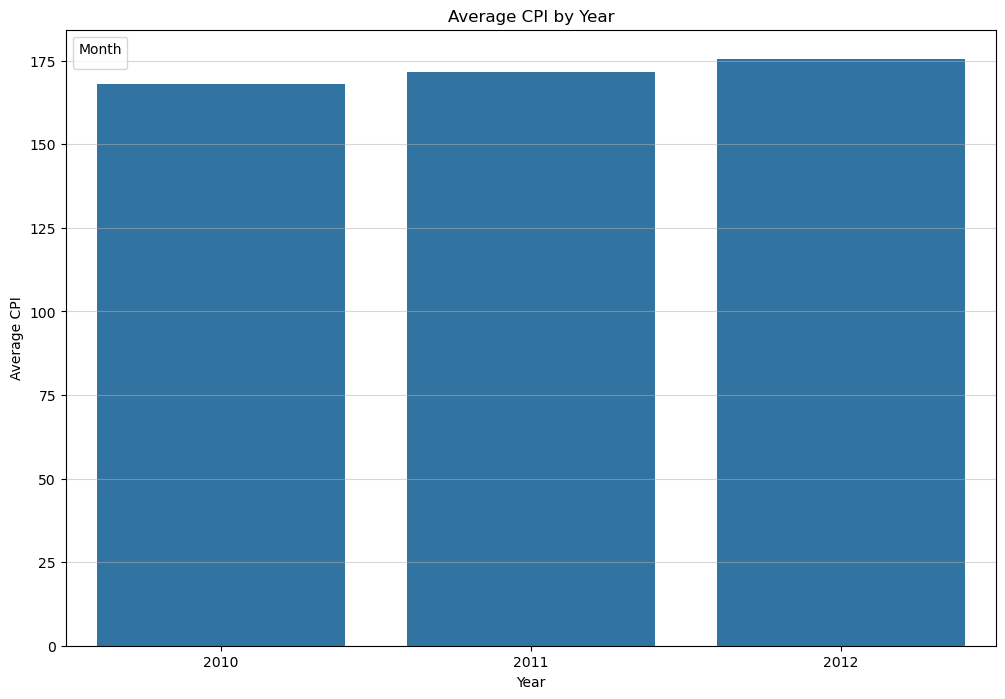

In [64]:
#cpi average by year
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_data, x='Year', y='CPI', ci=None)
plt.title("Average CPI by Year")
plt.xlabel("Year")
plt.ylabel("Average CPI")
plt.legend(title="Month")
plt.grid(axis='y', alpha=0.5)
plt.show()

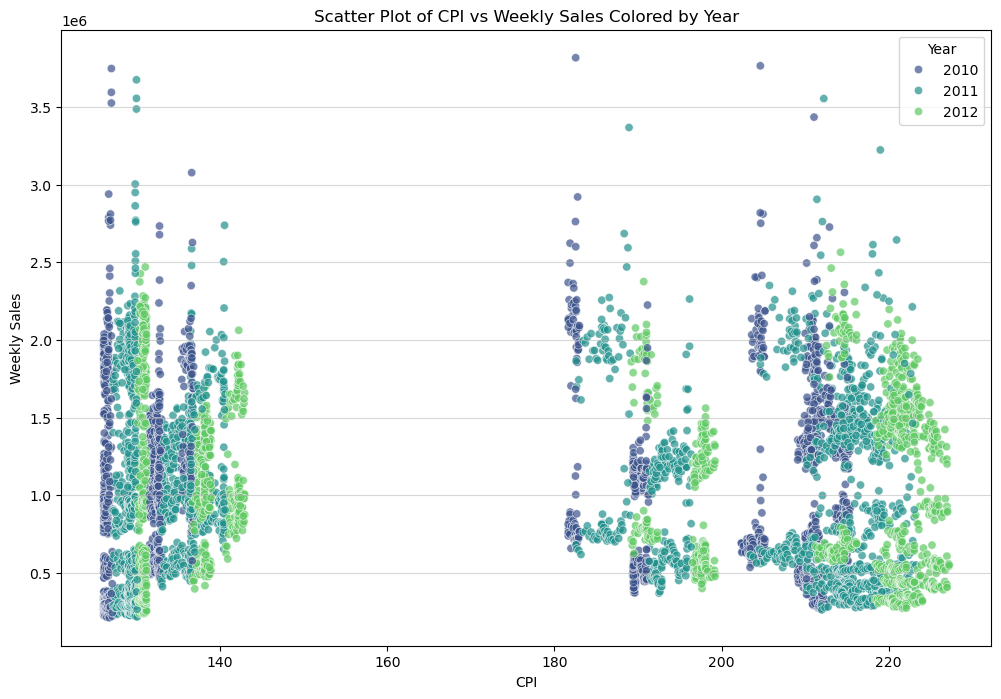

In [66]:
# Scatter plot of CPI values colored by Year
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sales_data, x='CPI', y='Weekly_Sales', hue='Year', palette='viridis', alpha=0.7)
plt.title("Scatter Plot of CPI vs Weekly Sales Colored by Year")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.legend(title="Year")
plt.grid(axis='y', alpha=0.5)
plt.show()

1. CPI is showing different clusters across timeline.

## 2.4 Unemployment

C:\Users\aravi\AppData\Local\Temp\ipykernel_17616\1118875896.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_data, x='Month', y='Unemployment', hue='Year', ci=None)


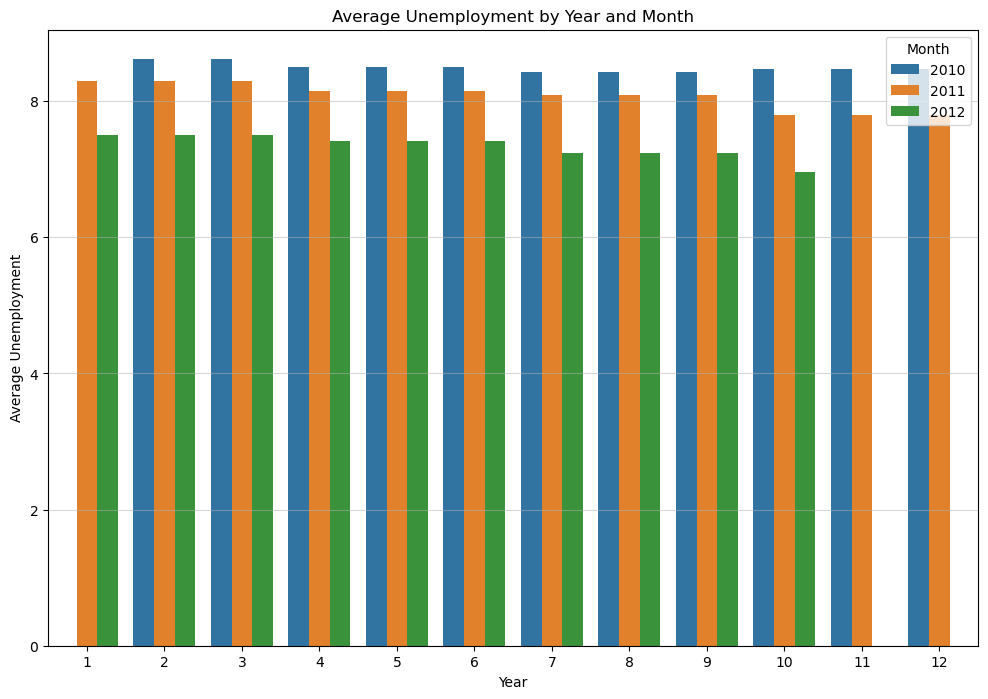

In [67]:
#unemployment average by year and month
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_data, x='Month', y='Unemployment', hue='Year', ci=None)
plt.title("Average Unemployment by Year and Month")
plt.xlabel("Year")
plt.ylabel("Average Unemployment")
plt.legend(title="Month")
plt.grid(axis='y', alpha=0.5)
plt.show()

It shows that unemployment rate is reduced as the time passed